#                             Beer Analysis 5 Question Quiz

In [1]:
# import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from warnings import simplefilter
simplefilter(action='ignore')

In [2]:
# read in dataset into pandas
df = pd.read_csv('BeerDataScienceProject.csv', encoding = 'ISO-8859-1')

In [3]:
# create copy if needed for data exploration and data visualization
df1 = df.copy()

In [4]:
# take a look at dataframe 
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [5]:
# take a look at shape
print(df.shape)

(528870, 13)


In [6]:
# take a look at properties of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
# take a look at descriptive statistics of the variables in the dataset
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [8]:
# take a look at missing values
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [9]:
# calculate % of missing entries 
df.isnull().mean()

beer_ABV              0.038346
beer_beerId           0.000000
beer_brewerId         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_palette        0.000000
review_overall        0.000000
review_taste          0.000000
review_profileName    0.000217
review_aroma          0.000000
review_text           0.000225
review_time           0.000000
dtype: float64

In [10]:
# drop review_profileName and review_text missing entry rows and fill beer_ABV missing entry rows with mean
df["beer_ABV"] = df["beer_ABV"].fillna(value=df["beer_ABV"].mean())
df.dropna(inplace=True)
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

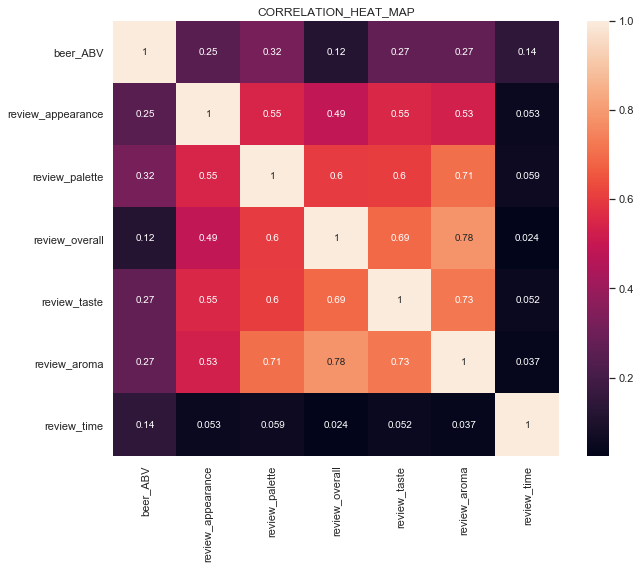

In [11]:
# look for trends/correlations by plotting a correlation heatmap, remove ids from heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
df2 = df1.drop(labels=['beer_beerId','beer_brewerId'], axis=1)
corr = df2.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Correlation heatmap shows that there is strong correlation between overall review and review_aroma.  There is also strong correlation between review_aroma and review_taste.  Finally, there is strong correlation between review_aroma and review_palette as well as overall review and review_taste. Thus, we can conclude an association between overall review and the taste and/or aroma of the beer. 

### The Correlation heatmap shows a negative correlation between overall review and beer_ABV indicating the beer review is not correlated strongly with the alcoholic content of the beer.

## Question1: Rank top 3 Breweries which produce the strongest beers?

In [12]:
# since df1 contains duplicate beerIds, we need to drop those in order to accurately answer the question
beer_df = df1.drop_duplicates(subset='beer_beerId')

In [13]:
# take a look at the shape of new dataframe
beer_df.shape

(20200, 13)

In [13]:
# take a look at the dataframe to visualize the top three breweries with the strongest beers
beer_df.sort_values(['beer_ABV','beer_brewerId'],ascending=False).head(15)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12888,30.86,51466,6513,Schorschbräu Schorschbock 31%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,Bottle @ home (of course not the whole bottle ...,1248785936
293656,27.00,25759,35,Samuel Adams Utopias,American Strong Ale,5.0,4.0,4.5,5.0,wesleyhighley,4.0,"I bought this bottle in 2007, drank it for the...",1293667236
286261,25.00,9840,35,Samuel Adams Utopias MMIII,American Strong Ale,4.5,4.0,3.5,3.5,Kenny411,3.5,I had a connection that had their bottle fille...,1298323843
317616,25.00,41120,35,Samuel Adams Utopias (Aged On Cocoa Nibs),American Strong Ale,3.0,3.5,2.0,3.0,LilBeerDoctor,3.5,Extreme Beer Fest 2/15/08: Dark amber in color...,1230426927
297499,24.00,2683,35,Samuel Adams Utopias MMII,American Strong Ale,4.5,4.5,4.5,4.5,largadeer,4.5,2002 Utopias. Thanks to Arthur for the chance ...,1319135850
284086,21.00,1640,35,Samuel Adams Millennium,American Strong Ale,4.0,4.0,4.5,4.5,cpetrone84,4.0,"Had back in April, Utopias right before. Pours...",1321970235
58570,19.50,74295,16866,Grey Monday,American Double / Imperial Stout,4.0,5.0,4.5,4.5,Hands22,5.0,Served from a cask in 6oz pours at Beachwood B...,1318997327


In [14]:
# compare this answer by doing a groupby on the maximum ABV
beer_df.groupby('beer_brewerId').beer_ABV.max().sort_values(ascending=False).head(10)

beer_brewerId
6513     57.7
35       27.0
16866    19.5
2958     19.5
18796    19.2
848      18.4
1628     18.0
24803    18.0
4614     18.0
351      18.0
Name: beer_ABV, dtype: float64

## According to data exploration, the top three breweries serving the strongest beers are 1.) brewery 6513  2.) brewery 35 and  3.) a tie between brewery 16866 and 2958

In [15]:
# try another method to validate if brewery 16866 and brewery 2958 are indeed tied
df_strong = df1.sort_values(['beer_ABV', 'beer_brewerId'], ascending = False).iloc[0:1000]
df_strong.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12912,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,thepeter,3.5,Very lucky to get a 2oz sample of this at a ta...,1274645294


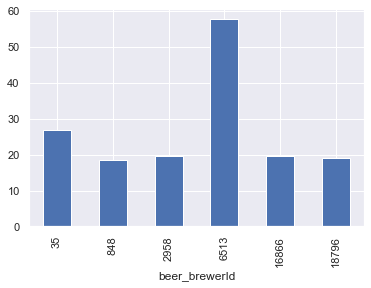

In [16]:
# perform a groupby between brewer_Id and beer_ABV to visualize which breweries serve the strongest beers
df_strong.groupby('beer_brewerId').beer_ABV.max().plot(kind='bar')

In [17]:
# numerically evaluate between beer_brewerId 2958 and 16866
df_strong.groupby('beer_brewerId').beer_ABV.max()

beer_brewerId
35       27.0
848      18.4
2958     19.5
6513     57.7
16866    19.5
18796    19.2
Name: beer_ABV, dtype: float64

## Answer1:  Statistical analyses indicates the top three ranked brewery id's serving the strongest ABV beers are 1.) 6513, 2.) 35, and 3.) a tie between 2958 and 16866

In [18]:
# take a look at answer if mean groupby is used instead of max
df_strong.groupby('beer_brewerId').beer_ABV.mean().sort_values(ascending=False).head(10)

beer_brewerId
6513     41.840000
35       26.406542
2958     19.500000
18796    19.200000
848      18.400000
16866    18.322424
Name: beer_ABV, dtype: float64

## Answer1: Statistical analyses utilizing groupby mean instead of groupby max gives a slightly different answer with the top three ranked breweries serving the strongest ABV beers being 1.)6513, 2.) 35 and 3.) 2958.  Utilizing mean groupby shows that brewery 16866 ranks #6.

In [19]:
# take a look at how many unique beer names are in the strong beer dataset
df_name_unique = df_strong['beer_name'].unique()
len(df_name_unique)

18

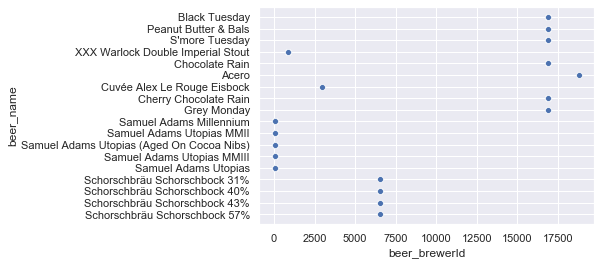

In [20]:
# plot the top 5 highest ABV serving breweries against the 18 unique beer names
sns.scatterplot(x = 'beer_brewerId', y = 'beer_name', data = df_strong)
plt.show()

### This shows that while brewery id 6513 serves the strongest ABV beers that brewery id 16866 serves more variety of strong beers.

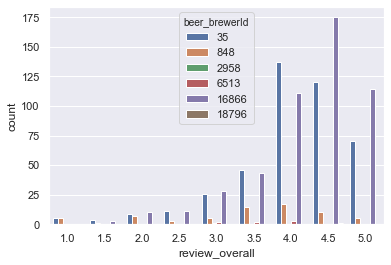

In [21]:
# plot the breweries serving the strongest beers against the overall review of those breweries
sns.countplot(x='review_overall', data=df_strong, hue='beer_brewerId')

### This shows that although beer_brewerId 6513 serves the strongest beers, it does not have the strongest reviews which matches the negative correlation seen between reviews and beer_ABV on the correlation heatmap.

## Question2: Which year did beers enjoy the highest ratings?

In [22]:
# first convert to readable datetime from unix
df1[ 'review_time' ] = pd.to_datetime(df1[ 'review_time' ], unit = 's' )

In [23]:
# take a look at dataframe
df1.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


In [24]:
# make sure that date is in datetime
df1.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object

In [25]:
# get max time date stamp
df1.review_time.max()

Timestamp('2012-01-11 10:10:56')

In [26]:
# get min time date stamp
df1.review_time.min()

Timestamp('1998-01-10 00:00:01')

### This shows the dataset spans from 1998 to 2012-almost 15 years.

In [27]:
# create column in data frame for year only
df1['year'] = df1.review_time.dt.year

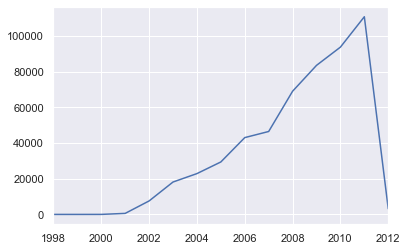

In [28]:
# plot year against count to notice any trends from year to year
df1.year.value_counts().sort_index().plot()

### This shows the reviews have steadily climbed over time with the highest count of reviews in 2011

In [29]:
# do a groupby between reviews and year to determine if 1998,1999, or 2000 have highest average reviews
df1.groupby('year').review_overall.mean()

year
1998    3.891304
1999    4.000000
2000    4.181818
2001    3.927741
2002    3.798905
2003    3.752900
2004    3.794630
2005    3.832042
2006    3.798192
2007    3.809552
2008    3.833939
2009    3.864390
2010    3.866139
2011    3.828093
2012    3.829717
Name: review_overall, dtype: float64

### Data exploration indicates the year 2000 had the highest average reviews and the year 2003 had the lowest average reviews

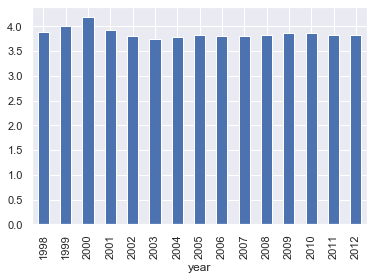

In [30]:
# perform groupby barplot between overall_review and year
df1.groupby('year').review_overall.mean().plot(kind='bar')

### Data visualization shows that 1998, 1999 and 2000 enjoyed the highest reviews and that 2003 had the lowest reviews. 

## Answer2: In conclusion, based on data visualizations and statistical analysis, the year 2000 enjoyed the highest average beer ratings.  Data exploration and visualization shows that 1998 and 1999 also had high reviews and this could suggest that there were less reviews written in those earlier years or that folks gave reviews with higher rating in those earlier years.  

## Question3: Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [31]:
# drop extra columns not needed in analysis
df3 = df2.drop(labels=['beer_ABV','review_time'], axis = 1)

In [32]:
# first take a look at statistical correlation values between ratings and all other features
df3.corr()['review_overall'].sort_values(ascending=False)

review_overall       1.000000
review_aroma         0.783002
review_taste         0.692454
review_palette       0.601971
review_appearance    0.486687
Name: review_overall, dtype: float64

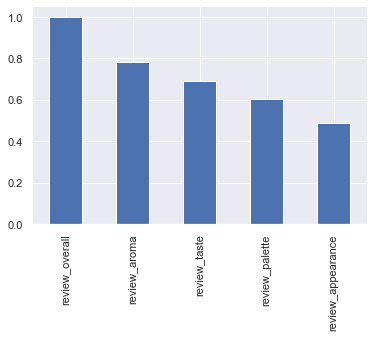

In [33]:
# now take a look visually at the correlations between reviews and aroma, taste, palette, and appearance. 
df3.corr()['review_overall'].sort_values(ascending=False).plot(kind = 'bar')

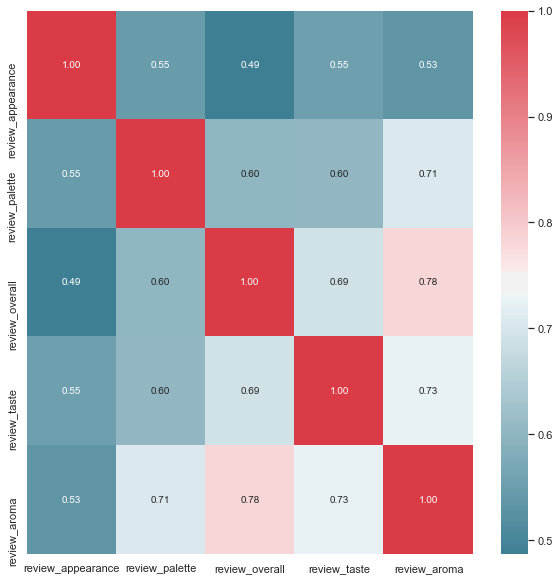

In [34]:
#create a correlation heatmap
corr_plot = df3.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap=sns.diverging_palette(220,10, as_cmap=True)
_ = sns.heatmap(corr_plot,cmap=colormap,annot=True,fmt=".2f", xticklabels=corr_plot.columns, yticklabels=corr_plot.columns)
plt.show()

## The data visualization and statistical analyses show that review aroma is the most correlated with overall user rating followed by review_taste, review_palette and review_appearance. Review_appearance is the least correlated with overall user ratings.  The correlation heatmap also shows there is strong colinearity between review_aroma and review_taste as well as between review_aroma and review_palette.

In [35]:
# create ml model to see which feature is the strongest in determining overall rating
x_cols = ['review_aroma', 'review_taste', 'review_palette','review_appearance']
X = df[x_cols].as_matrix()
print(X.shape)
print(type(X))

(528636, 4)
<class 'numpy.ndarray'>


In [36]:
# assign the predictor(target) variable
y = df['review_overall'].values
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(528636,)


In [37]:
# create a random forest regressor model between the different features and the prediction of overall user rating 
# choose random forest regressor since it has less bias than linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.666
accuracy on the test subset:0.653


In [38]:
# create a random forest regressor model between review_aroma and the prediction of overall user rating 
x1_cols = ['review_aroma']
X1 = df[x1_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.623
accuracy on the test subset:0.622


In [39]:
# create a random forest regressor model between review_taste and the prediction of overall user rating 
x2_cols = ['review_taste']
X2 = df[x2_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X2,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.488
accuracy on the test subset:0.488


In [40]:
# create a random forest regressor model between review_palette and the prediction of overall user rating 
x3_cols = ['review_palette']
X3 = df[x3_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.373
accuracy on the test subset:0.374


In [41]:
# create a random forest regressor model between review_appearance and the prediction of overall user rating 
x4_cols = ['review_appearance']
X4 = df[x4_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X4,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.243
accuracy on the test subset:0.240


## The Random Forest Regressor creates the best predictive model with all four features together. However, there is not much difference in accuracy between all four features and review_aroma alone.  Therefore, the model rates the features in the following order based on model accuracy: 1. review_aroma 2. review_taste 3. review_palette 4. review_appearance

In [42]:
# define dataset
x5_cols = ['review_aroma', 'review_taste', 'review_palette','review_appearance']
X5 = df[x5_cols].as_matrix()
# summarize the dataset
print(X5.shape, y.shape)

(528636, 4) (528636,)


Feature: 0, Score: 0.92631
Feature: 1, Score: 0.05559
Feature: 2, Score: 0.00859
Feature: 3, Score: 0.00950


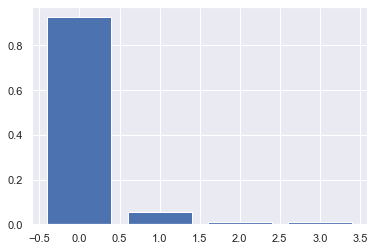

In [43]:
#utilize weighted feature importance on Random Forest Regressor and also plot answer
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X5, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Based on the random forest regression weighted feature selection, review_aroma and review_taste are the most important features.  Meanwhile, review_palette and review_appearance are not weighted very important at all.

In [44]:
# create a linear regression model for features chosen
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=42)
linreg.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(422908, 4) (105728, 4) (422908,) (105728,)


In [45]:
# take a look at R^2 score for linear regression model
from sklearn.metrics import mean_squared_error
y_pred = linreg.predict(X_test)
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X,y)
print("r2 score is:", r2_score)

root mean square error is: 0.42229643091923197
mean square error is: 0.17833427556712164
r2 score is: 0.6475744241520862


In [46]:
# Import regression modules and utilize ordinary least squares(OLS) to look at rsquared and coeff for review_aroma
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('review_overall ~ review_aroma',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 8.376e+05
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:29:13   Log-Likelihood:            -3.1802e+05
No. Observations:              528636   AIC:                         6.361e+05
Df Residuals:                  528634   BIC:                         6.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8812      0.003    268.490   

## The review_aroma feature has an adjusted R2 of .61 and coefficient value of .77.  There is not much difference between the R2 for all four features(R2 = .64) and review_aroma alone.  This agrees with weighted feature selection as well as random forest regressor accuracy.

In [47]:
# Use OLS stats to look at feature review_taste
m = ols('review_overall ~ review_taste',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 4.869e+05
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:29:13   Log-Likelihood:            -3.9643e+05
No. Observations:              528636   AIC:                         7.929e+05
Df Residuals:                  528634   BIC:                         7.929e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0658      0.004    264.602   

## The review_taste feature has an adjusted R2 of .48 and a coefficient value of .73

In [48]:
# Use OLS stats to look at feature review_palette
m = ols('review_overall ~ review_palette',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 3.004e+05
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:29:14   Log-Likelihood:            -4.5007e+05
No. Observations:              528636   AIC:                         9.001e+05
Df Residuals:                  528634   BIC:                         9.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4890      0.004    342.

##  The review_palette feature has an adjusted R2 of .36 and a coefficient value of .62

In [49]:
# Use OLS stats to look at feature review_appearance
m = ols('review_overall ~ review_appearance',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 1.641e+05
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:29:14   Log-Likelihood:            -4.9756e+05
No. Observations:              528636   AIC:                         9.951e+05
Df Residuals:                  528634   BIC:                         9.951e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6225      0.00

## The review_appearance feature has an adjusted R2 of .24 and a coefficient value of .57.  

## Thus, the linear regression model shows that review_aroma is the most important feature followed by review_taste, review_palette and review_appearance.  

## Answer3: In conclusion,by running the features through different predictive machine learning and statistical tools, review_aroma was found to be the strongest predictor for overall review. 

## Question4: If you were to recommend 3 to 5 beers to your friends based on this data which ones will you recommend?

In [50]:
df_rate = df.groupby('beer_name').review_overall.agg(['mean','count'])
df_rate.head(10)

,mean,count
beer_name,,
"""100"" Pale Ale",4.000000,1
"""33"" Export",3.000000,3
"""76"" Anniversary Ale",4.000000,3
"""76"" Anniversary Ale With English Hops",4.000000,1
"""Fade To Black"" Porter",4.000000,1
"""Great Satchmo"" Stout",4.000000,1
"""Jessica & Brendan's"" Bridal Ale",2.916667,6
"""Just One More"" Scotch Ale",3.625000,4
"""Nein Toll Bier"" German Alt",4.000000,1


In [51]:
# sort from most important feature to least(for ex review_aroma strongest feature as found previously)
df_ratings = df.sort_values(['review_overall', 'review_aroma', 'review_taste','review_palette','review_appearance'], ascending = False)
df_top_ratings = df_ratings[0:2000]
df_top_ratings.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
433,6.1,10784,1075,Caldera IPA,American IPA,5.0,5.0,5.0,5.0,vicsju1991,5.0,12 oz can poured into duvel snifter A - pours ...,1325980456
1712,5.3,16491,1454,T.J.'s Best Bitter,English Bitter,5.0,5.0,5.0,5.0,shbobdb,5.0,Holy crap. This beer is amazing. Wow. Holy cra...,1182392570
1751,5.5,15660,1454,Wobbly Bob APA,American Pale Ale (APA),5.0,5.0,5.0,5.0,908carson,5.0,My first and only perfect score. I'm not sure ...,1288538410
2113,4.5,1557,577,Black Cuillin,Scottish Ale,5.0,5.0,5.0,5.0,dennis,5.0,Roasted oatmeal and honey. Thick dark but not ...,1000848115
2380,4.8,61800,16859,Blonde Ambition,American Blonde Ale,5.0,5.0,5.0,5.0,cstrong821,5.0,"A- great golden color, light foam. S- somewhat...",1313808291


In [52]:
# organize top beers by value counts since more reviews correlates w/ more people drinking that particular brand of beer
list3 = df_top_ratings.beer_name.value_counts()
list3[0:15]

Founders KBS (Kentucky Breakfast Stout)       108
Trappistes Rochefort 10                        84
Founders Breakfast Stout                       72
Founders CBS Imperial Stout                    50
Tröegs Nugget Nectar                           44
Orval Trappist Ale                             38
Chimay Grande Réserve (Blue)                   35
La Fin Du Monde                                33
Péché Mortel (Imperial Stout Au Cafe)          30
Sierra Nevada Celebration Ale                  29
Shakespeare Oatmeal Stout                      27
Samuel Smith's Oatmeal Stout                   26
Sierra Nevada Bigfoot Barleywine Style Ale     24
Hunahpu's Imperial Stout                       22
Masala Mama India Pale Ale                     21
Name: beer_name, dtype: int64

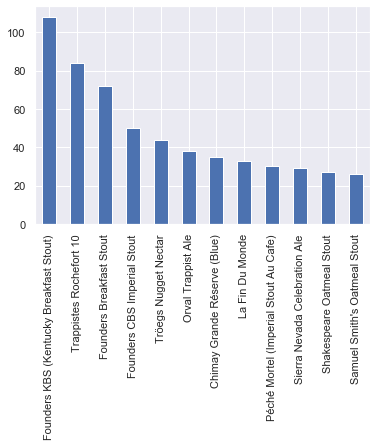

In [53]:
# plot the beer names with the highest count of reviews
list_3 = list3[0:12]
list_3.plot(kind='bar')

In [54]:
# sort values of the top rated beers 
df_top_ratings.sort_values(by = ['review_overall'], ascending = False ).head(10)\
    [ 'beer_name' ].unique()

array(['Caldera IPA', 'Orval Trappist Ale'], dtype=object)

In [55]:
# remove duplicates of the same beer name
df_top_rating = df_top_ratings.drop_duplicates(subset = 'beer_name', keep = 'first')
print(len(df_top_rating))
df_top_rating.sort_values( by = ['review_overall'], ascending = False ).head(10) \
    [ 'beer_name' ].unique()

587


array(['Caldera IPA', 'Molson Stock Ale', 'Black Snow Coffee Porter',
       'Pothole Filler Imperial Stout', 'Pumpkineater Imperial Ale',
       'Goodes Highland Scotch Ale',
       'Total Eclipse Of The Hop Imperial India Pale Ale',
       "Father John's Winter Ale", 'Rail Ale', 'Mettleman Copper Ale'],
      dtype=object)

## Answer4: Therefore, the beers to recommend to a friend would be 1.)Founder's KBS,  2.) Trappistes Rochefort 10,  3.) Founder's Breakfast Stout, and  4.) Pilsner Urquel based on overall reviews and review counts of each beer.  

## Question5: Which beer style seems to be the favorite based on reviews written by users? How does written review compare to overall review score for the beer style?


In [56]:
# organize top beers by value counts since more reviews correlates w/ more people drinking that particular brand of beer
list5 = df_top_ratings.beer_style.value_counts()
print(list5[0:20])

American Double / Imperial Stout    424
American IPA                        162
American Double / Imperial IPA      114
Russian Imperial Stout               98
Quadrupel (Quad)                     88
Belgian Strong Dark Ale              82
American Amber / Red Ale             68
Oatmeal Stout                        55
Tripel                               51
American Barleywine                  50
Belgian Pale Ale                     44
American Strong Ale                  38
American Pale Ale (APA)              35
Lambic - Fruit                       35
American Stout                       34
American Porter                      32
Fruit / Vegetable Beer               32
Dubbel                               30
Rye Beer                             29
Doppelbock                           23
Name: beer_style, dtype: int64


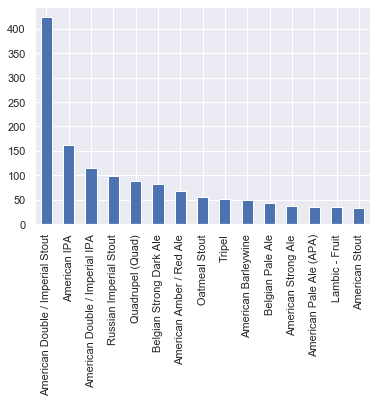

In [57]:
# plot the beer styles with the highest count of reviews
list_5 = list5[0:15]
list_5.plot(kind='bar')

In [58]:
# sort unique values to in order to choose top ten beers by beer style
df_top_ratings.sort_values( by = ['review_overall'], ascending = False ).head(20) \
    [ 'beer_style' ].unique()

array(['American IPA', 'Belgian Pale Ale'], dtype=object)

In [59]:
# remove duplicates of the same beer name
df_top_rating = df_top_ratings.drop_duplicates(subset = 'beer_style')
df_top_rating.sort_values( by = ['review_overall'], ascending = False ).head(20) \
    [ 'beer_style' ].unique()

array(['American IPA', 'American Amber / Red Lager', 'Winter Warmer',
       'German Pilsener', 'Belgian Strong Dark Ale', 'Gueuze',
       'Belgian Dark Ale', 'English India Pale Ale (IPA)', 'Light Lager',
       'Altbier', 'English Pale Mild Ale', 'Pumpkin Ale',
       'Flanders Red Ale', 'Chile Beer', 'Quadrupel (Quad)',
       'American Adjunct Lager', 'Märzen / Oktoberfest', 'Dunkelweizen',
       'Belgian Pale Ale', 'Oatmeal Stout'], dtype=object)

## Answer5: Therefore based on the analysis of overall reviews and the review counts of each beer, the 1.) American Double/Imperial Stout, 2.) American IPA, 3.) American Double/Imperial IPA, and the 4.) Czech Pilsner would be the best beer_styles to recommend to a friend

## Question5 continued: Now, How does written review compare to overall review score for the beer style?

In [60]:
# import nltk packages in order to take a look at review_text written by users and rank based on the text
import re
import nltk
import nltk.corpus
import re
import string
from nltk.corpus import stopwords
import nltk as nlp

In [61]:
# create list of positive and negative ratings based on 25% tiers in df.
list = []
for i in df.review_overall:
    if i > 4.50:
        list.append('positive_rating')
    elif i < 3.50:
        list.append('negative_rating')    
    else:
        list.append('other')

In [62]:
# take a look at first five ratings in  the list
list[0:5]

['negative_rating',
 'negative_rating',
 'negative_rating',
 'negative_rating',
 'other']

In [63]:
# add list to data frame under column name rating
df['rating'] = list
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,rating
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,negative_rating
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,negative_rating
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,negative_rating
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,negative_rating
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,other


In [64]:
# drop the 'other' values
dat = df[df.rating != 'other']
dat.shape

(122419, 14)

In [65]:
# Create numerical column rating that will be used later for response vector
dat['rating'] = dat.rating.map({'positive_rating':1, 'negative_rating':0})
dat.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,rating
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,0
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,0
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,0
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,0
5,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,3.5,3.5,3.0,3.0,oline73,3.5,Poured from the bottle into a Chimay goblet. A...,1325524659,0


In [66]:
# take a look at data frame
df4 = dat[['rating','review_text','beer_style','review_overall']]
df4.head()

,rating,review_text,beer_style,review_overall
0,0,A lot of foam. But a lot. In the smell some ba...,Hefeweizen,1.5
1,0,"Dark red color, light beige foam, average. In ...",English Strong Ale,3.0
2,0,"Almost totally black. Beige foam, quite compac...",Foreign / Export Stout,3.0
3,0,"Golden yellow color. White, compact foam, quit...",German Pilsener,3.0
5,0,Poured from the bottle into a Chimay goblet. A...,Herbed / Spiced Beer,3.0


In [67]:
# convert all dialogue to list of text in order to begin text pre-processing
tex = df4['review_text'].tolist()
text = str(tex)

In [68]:
# Make function to lowercase text, remove punctuation, remove whitespace and remove words containing numbers
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.strip()
    return text

clean = lambda x: clean_text(x)

In [69]:
# Let's take a look at the updated text
from nltk.tokenize import word_tokenize
updated_text = pd.DataFrame(df4['review_text'].apply(clean))
updated_text.head()

,review_text
0,a lot of foam but a lot in the smell some bana...
1,dark red color light beige foam average in the...
2,almost totally black beige foam quite compact ...
3,golden yellow color white compact foam quite c...
5,poured from the bottle into a chimay goblet ap...


In [70]:
# still need to remove stop words and lemmatize to further clean
from nltk.tokenize import word_tokenize
text1 = updated_text['review_text'].tolist()
text2 = str(text1)
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def cleaner_text(text2):
    text2 = word_tokenize(text2)
    text2 = [i for i in text2 if not i in stop_words]
    text2 = " ".join([lemmatizer.lemmatize(t) for t in text2])
    return text2

clean2 = lambda x: cleaner_text(x)

In [71]:
# Let's take a look at the updated text2
updated = pd.DataFrame(updated_text['review_text'].apply(clean2))
updated.head()

,review_text
0,lot foam lot smell banana lactic tart good sta...
1,dark red color light beige foam average smell ...
2,almost totally black beige foam quite compact ...
3,golden yellow color white compact foam quite c...
5,poured bottle chimay goblet appearance pours s...


In [72]:
# keep only pre-processed text;remove text from previous data frame and then merge data frames
df4.drop(['review_text'], axis=1, inplace=True)

In [73]:
# take a look at the dataframe
updated.head()

,review_text
0,lot foam lot smell banana lactic tart good sta...
1,dark red color light beige foam average smell ...
2,almost totally black beige foam quite compact ...
3,golden yellow color white compact foam quite c...
5,poured bottle chimay goblet appearance pours s...


In [74]:
# merge both data frames together
data = pd.concat([df4, updated], axis=1)
data.head()

,rating,beer_style,review_overall,review_text
0,0,Hefeweizen,1.5,lot foam lot smell banana lactic tart good sta...
1,0,English Strong Ale,3.0,dark red color light beige foam average smell ...
2,0,Foreign / Export Stout,3.0,almost totally black beige foam quite compact ...
3,0,German Pilsener,3.0,golden yellow color white compact foam quite c...
5,0,Herbed / Spiced Beer,3.0,poured bottle chimay goblet appearance pours s...


In [75]:
# create target variable of 'good_rating' and 'bad_rating' to be response vector;
# review_text will be converted into doc term matrix 
X = data.review_text
y = data.rating
print(X.shape)
print(y.shape)

(122419,)
(122419,)


In [76]:
# divide into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91814,)
(30605,)
(91814,)
(30605,)


In [77]:
# instantiate, fit,and transform test and training set into document term matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print("training set:", X_train_dtm.shape)
print("test set:", X_test_dtm.shape)

training set: (91814, 102724)
test set: (30605, 102724)


In [78]:
# take a look at properties of weighted words
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(smooth_idf=True, use_idf=True)
tf.fit(X_train_dtm)
idf = pd.DataFrame(tf.idf_,index=vect.get_feature_names(),columns=['weights'])
sort = idf.sort_values(by=['weights'],ascending=False)
sort.weights[0:20]

lemonmelon             11.734384
mustthat               11.734384
mustskunk              11.734384
mustlike               11.734384
mustinsmitty           11.734384
mustinessslightly      11.734384
mustinessnot           11.734384
mustinessearthiness    11.734384
mustinessalmost        11.734384
mustiest               11.734384
musthouse              11.734384
musthit                11.734384
musthaves              11.734384
mustgrab               11.734384
mustardyellow          11.734384
mustardseed            11.734384
mustardlike            11.734384
muststop               11.734384
mustyalmond            11.734384
mussles                11.734384
Name: weights, dtype: float64

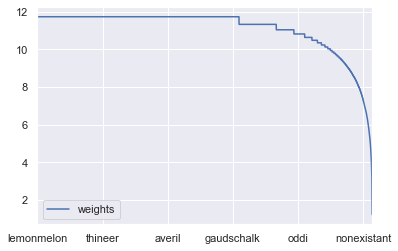

In [79]:
# plot weight distribution of words
%matplotlib inline
sort.plot()

In [80]:
# since multinomial works well for wide data sets and word classification, instantiate mulitnomialNB classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 98.5 ms, sys: 28.3 ms, total: 127 ms
Wall time: 141 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9019441267766705

In [82]:
# print the confusion matrix 
metrics.confusion_matrix(y_test, y_pred_class)

array([[21352,  1418],
       [ 1583,  6252]])

In [83]:
# print text for the false positives(negative_rating incorrectly classified as positive_rating) 
list2 = X_test[y_test < y_pred_class]

In [84]:
# take a look at 18 examples of the false positives
list2[0:18]

8717      inky brown almost opaque dark tan head good th...
95038     enjoy ipas especially stone brewing co lagunit...
300117    poured big bottle small snifter head light flu...
284044    brew always good decision appearance cloudy go...
134558    bottle city beer store sf made trip back suitc...
447962    pours deep dark red hazy small purple head lit...
507554    used motor oil brown pour little head present ...
114066    brown ale conditioned one year maker mark bour...
358601    poured deep yellowush color good carbonation n...
225687    wow powerful stuff oakaged woody aftertaste th...
505146    pours dark definitive brown one finger loose t...
457381    chocolaty almost much experience must say one ...
247869    gorgeous burgundy hue matter floating though b...
525233    good looking beer near black brown head two fi...
506984    perfect session drinking sweetish prickly malt...
295367    served cellar temperature pint glass appearanc...
19475     reviewed note sampled pours de

In [85]:
# take a look at review_rating of a false positive text
df.review_overall.iloc[472551]

3.5

In [86]:
# take a look at why the ml model detrmined this text to be a false positive
df.review_text.iloc[472551]

'Pours a nice red. Froathy off-white head. Slight carbonation. A- Hops, malty, alcohol, alcohol, umm alcohol, grapey. T- Sweet and malty with a huge kick of alcohol. A little dry and bitter in the middle. M- A little rough with a slight alcohol burn. D- It warms you up, but be careful.'

### Looking at the false positive text, it's apparent that "the looks are best part" and "good amount of malt" was used to be sarcastic and sarcastic tones can confuse NLP ml models into thinking the text is positive when it's actually negative

In [87]:
# add list to data frame under column name rating
data['written'] = list2
data.head()

,rating,beer_style,review_overall,review_text,written
0,0,Hefeweizen,1.5,lot foam lot smell banana lactic tart good sta...,NaN
1,0,English Strong Ale,3.0,dark red color light beige foam average smell ...,NaN
2,0,Foreign / Export Stout,3.0,almost totally black beige foam quite compact ...,NaN
3,0,German Pilsener,3.0,golden yellow color white compact foam quite c...,NaN
5,0,Herbed / Spiced Beer,3.0,poured bottle chimay goblet appearance pours s...,NaN


In [88]:
# drop missing values
data.dropna(inplace=True)
data.head()

,rating,beer_style,review_overall,review_text,written
659,0,American IPA,3.0,poured small snifter light sunset orange color...,poured small snifter light sunset orange color...
1463,0,Euro Pale Lager,3.0,beer huge greece everywhere time draft rythmno...,beer huge greece everywhere time draft rythmno...
1569,0,Euro Pale Lager,3.0,like hot weather bier poured hard glass elimin...,like hot weather bier poured hard glass elimin...
2201,0,American Double / Imperial IPA,3.0,got kentucky trip three year back poured sam g...,got kentucky trip three year back poured sam g...
2897,0,American Double / Imperial IPA,3.0,pours cloudy dark amber orange white head good...,pours cloudy dark amber orange white head good...


In [89]:
# sort unique values to in order to choose top ten beers by beer style
data.sort_values( by = ['review_overall'], ascending = False ).head(15) \
    [ 'beer_style' ].unique()

array(['American IPA', 'American Porter', 'Dunkelweizen',
       'American Double / Imperial IPA',
       'American Double / Imperial Pilsner',
       'Bière de Champagne / Bière Brut', 'Winter Warmer',
       'American Strong Ale'], dtype=object)

In [90]:
# sort unique values to in order to choose top ten beers by beer style
df_top_ratings.sort_values( by = ['review_overall'], ascending = False ).head(15) \
    [ 'beer_style' ].unique()

array(['American IPA', 'Belgian Pale Ale'], dtype=object)

## Answer5 continued: Thus, American Double/Imperial IPA , American Double/Imperial Stout, American IPA and Quad are the same best beer_styles in both reviews_overall and review_texts.  Even though there were false positives in the text analysis, the NLP model accuracy was high at 90% and the false positives were low at 1494 out of 29,125 (~5%).  Therefore, both review_texts and reviews_overall were fairly equivalent predictors of beer_style.